## 9.1 확률분포의 추정

**✓ 분석하고자 하는 데이터가 어떤 확률변수로부터 실현된 표본이다**

## 확률분포의 결정

확률분포를 알아내는 일은 다음처럼 두 작업으로 나뉜다.

1. 확률변수가 베르누이분포, 이항분포, 정규분포 등의 기본 분포 중 어떤 확률분포를 따르는지 알아낸다.
 데이터가 생성되는 원리를 알거나 데이터의 특성을 알면 추측할 수 있다. 히스토그램을 그려서 확률분포의 모양을 살펴보고 힌트를 얻을 수도 있다.

2. 데이터로부터 해당 확률분포의 모수의 값을 구한다.

In [8]:
import pandas as pd 

from sklearn.datasets import fetch_california_housing  # 사이킷런의 캘리포니아 주택 데이터셋 가져오기

# 캘리포니아 주택 데이터셋 불러와서 변수에 저장
california = fetch_california_housing()

# 데이터프레임 생성 및 캘리포니아 주택 데이터의 특성들을 데이터프레임의 열로 추가
df = pd.DataFrame(california.data, columns=california.feature_names)

# 데이터프레임에 'target' 열 추가하여 캘리포니아 주택 가격(target) 데이터 저장
df['target'] = california.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


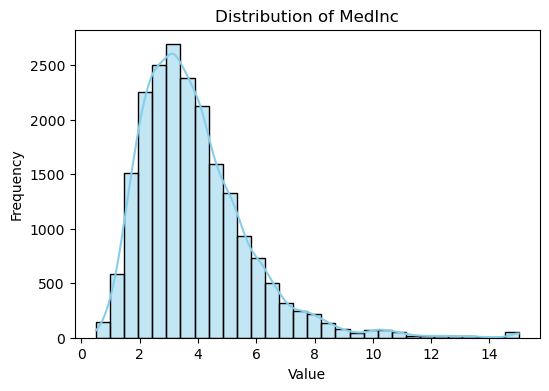

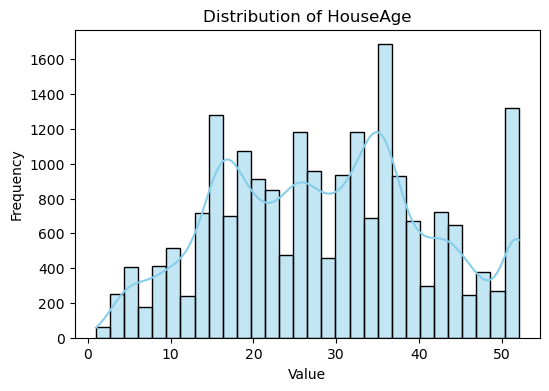

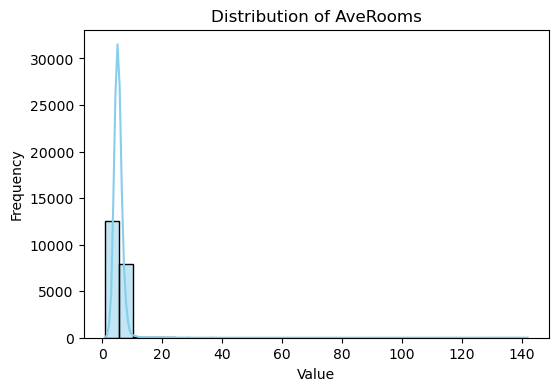

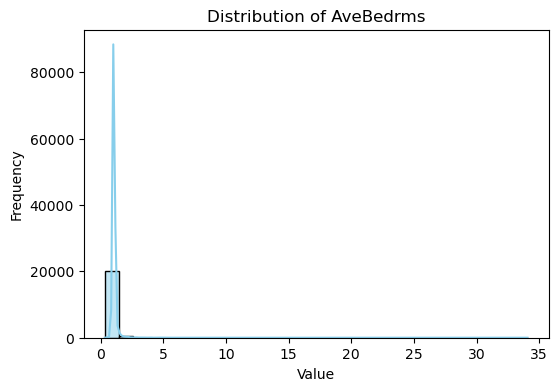

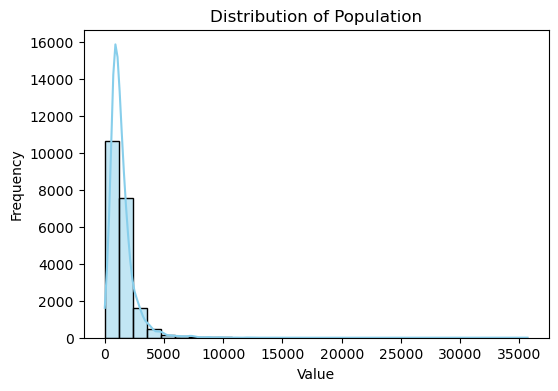

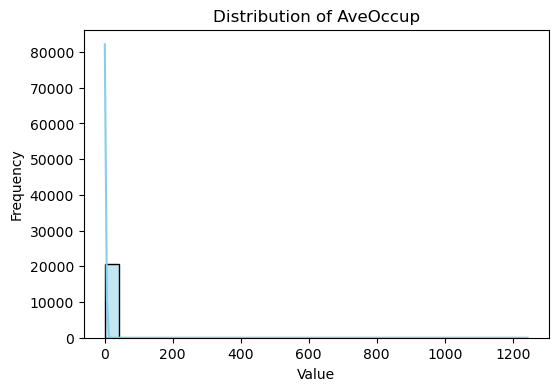

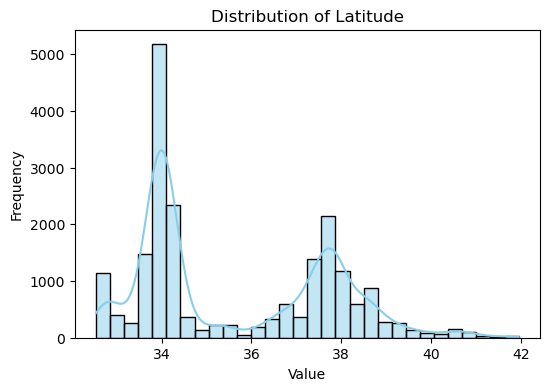

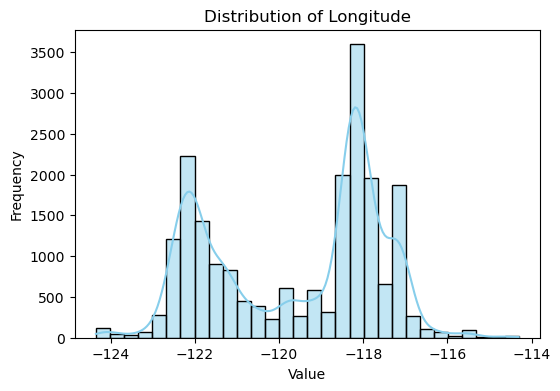

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# 데이터셋 로드
california_housing = fetch_california_housing()
data = california_housing.data
feature_names = california_housing.feature_names

# 각 특성에 대한 확률분포 시각화
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 4))
    sns.histplot(data[:, i], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


## 모수 추정 방법론

두번째 작업은  **모수의 값으로 가장 가능성이 높은 하나의 숫자를 찾아내는 작업을 모수 추정(parameter estimation)** 이라고 한다.

**1. 모멘트 방법**

**모멘트 방법(method of moment)은** 표본자료에 대한 표본모멘트가 확률분포의 이론적 모멘트와 같다고 가정하여 모수를 구한다.


$$
\begin{align*}
\text \quad \mu &= \text{E}[X] \stackrel{≜}{=} \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
\end{align*}
$$


$$
\text{(2차 모멘트(분산))} \quad \sigma^2 = \text{E}[(X - \mu)^2] \stackrel{≜}{=} \bar{s}^2 = \frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2
$$


## 예제: 베타 분포의 모수 추정

모멘트 방법으로 베타 분포의 모수 **a, b를**  구하면 다음과 같다. 이 경우에는 모수와 모멘트 간의 관계를 이용하여 비선형 연립 방정식을 풀어야 한다.

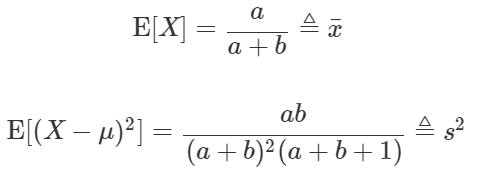

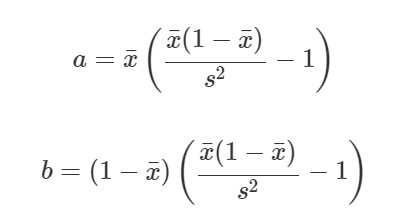

In [11]:
from IPython.display import Image
display(Image(filename='C:\\Users\\LG_GRAM\\Desktop\\picture2.png'))
display(Image(filename='C:\\Users\\LG_GRAM\\Desktop\\picture3.png'))

예를 들어 다음과 같은 데이터 100개가 있다고 하자. 값이 항상 0과 1사이에 있으므로 베타분포를 따른다고 가정하다. 사실 이 데이터는 a=15,b=12인 베타분포에서 생성한 것이다.

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4131830512.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, norm_hist=True, hist_kws={'edgecolor': 'white'})


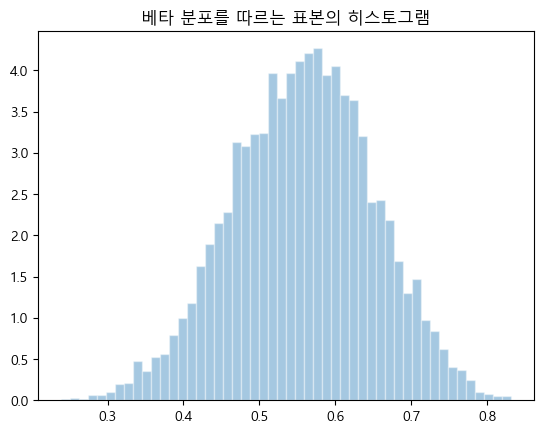

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'  

# Generate samples from a beta distribution
np.random.seed(0)
x = sp.beta(15, 12).rvs(10000)


sns.distplot(x, kde=False, norm_hist=True, hist_kws={'edgecolor': 'white'})
plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()


In [ ]:
# 모멘트 방법으로 모수를 계산하면 원래의 모수와 비슷한 값을 구할 수 있다.
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


**추정된 모수값으로 확률밀도분포를 그리면 히스토그램과 일치하는 것을 볼 수 있다.**

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\2768645148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, norm_hist=True, hist_kws={'edgecolor': 'white'})


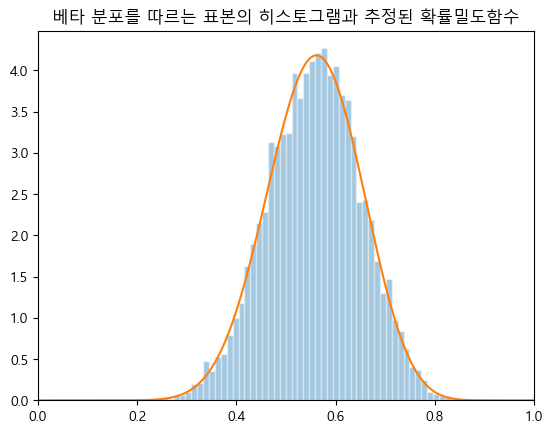

In [ ]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True, hist_kws={'edgecolor': 'white'})
plt.plot(xx, sp.beta(params[0], params[1]).pdf(xx))
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

연습 문제 9.1.2

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})


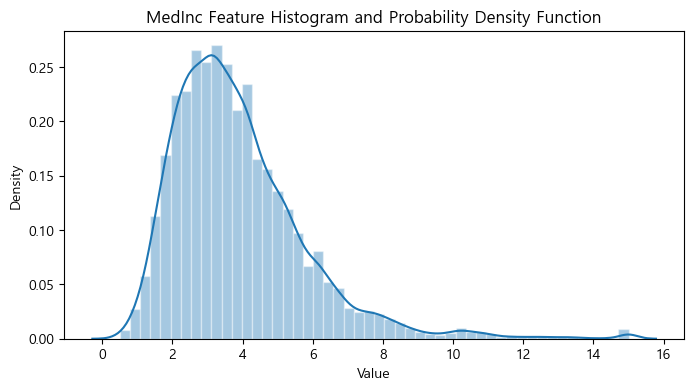

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})


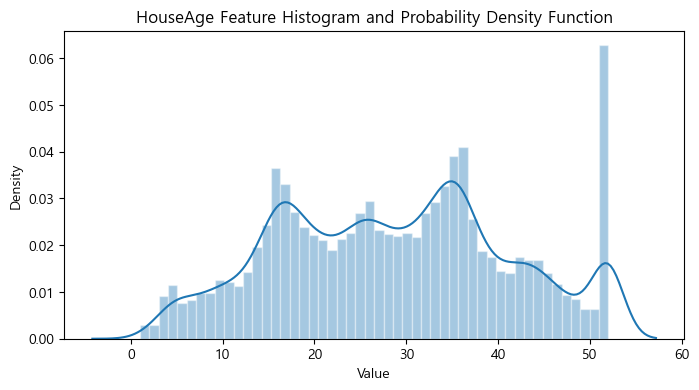

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})


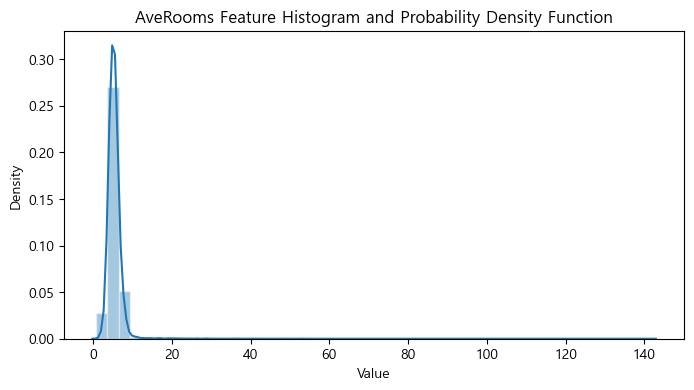

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})


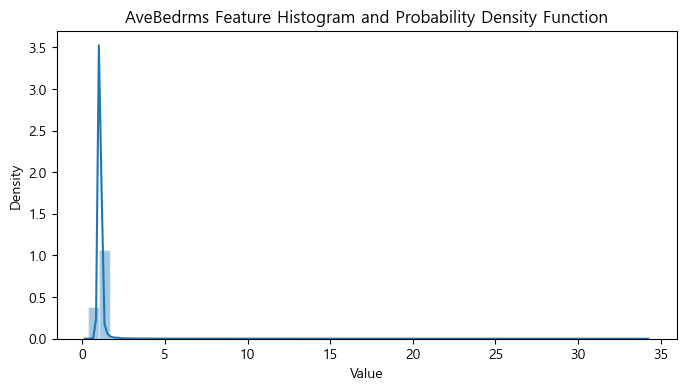

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})


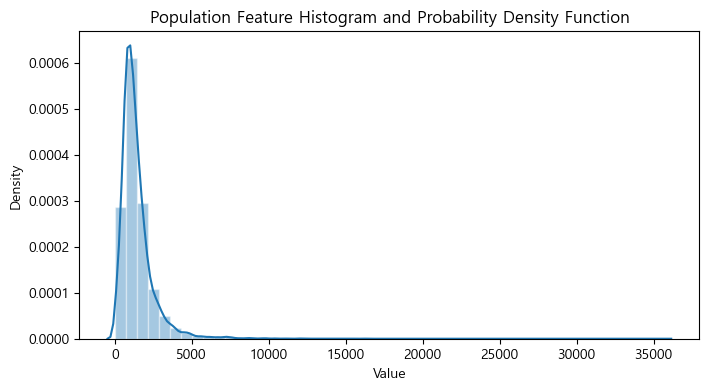

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})


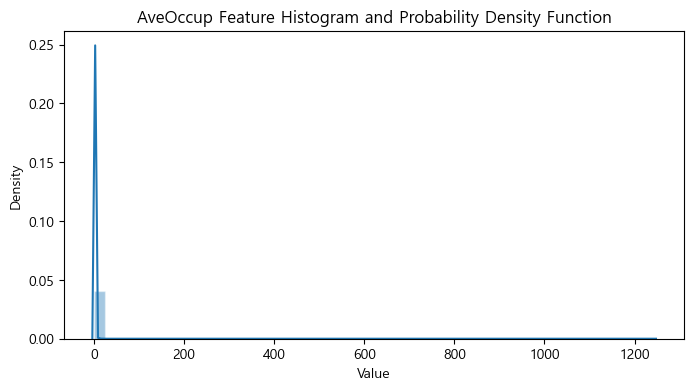

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})


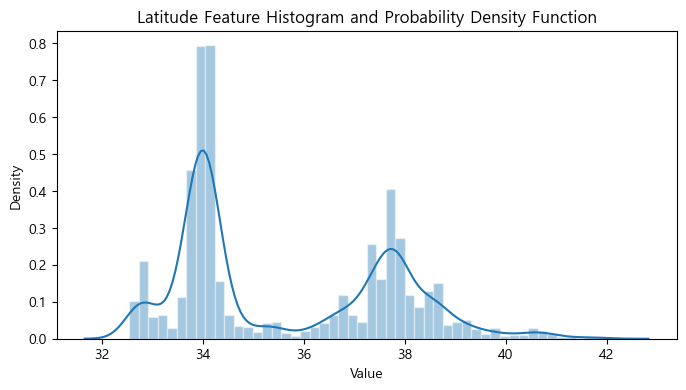

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4047394683.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})
c:\Users\LG_GRAM\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


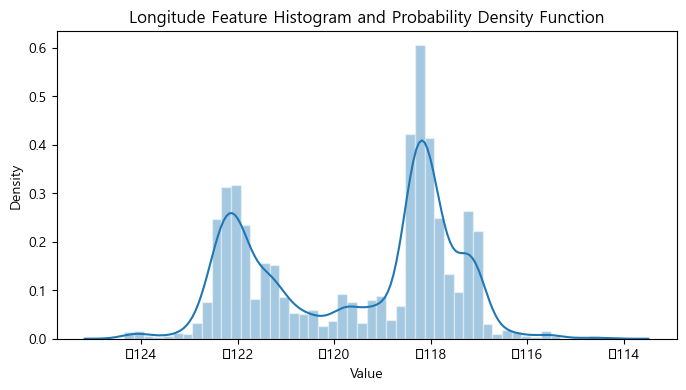

In [ ]:
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# California housing 데이터셋 로드
california_housing = fetch_california_housing()
data = california_housing.data
feature_names = california_housing.feature_names

# 각 특성에 대한 히스토그램과 확률밀도함수 시각화
for feature_name in feature_names:
    plt.figure(figsize=(8, 4))

    # 히스토그램과 확률밀도함수(커널 밀도 추정) 동시에 그리기
    sns.distplot(data[:, feature_names.index(feature_name)], bins=50, kde=True, hist_kws={'edgecolor': 'white'})
    plt.title(f'{feature_name} Feature Histogram and Probability Density Function')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()


## 9.4 검정과 유의확률

**검정(testing)** 은 데이터 뒤에 숨어있는 확률변수의 분포에 대한 가설이 맞는지 틀리는지 정량적으로 증명하는 작업이다. 

<h3> 가설과 검정 <h3>

확률분포에 대한 어떤 주장을 **가설(hypothesis)** 이라고 하며 H
로 표기한다. 이 가설을 증명하는 행위를 **검정(testing)** 이라고 한다. 특히 확률분포의 모숫값이 특정한 값을 가진다는 가설을 검정하는 것을 모수 검정(parameter testing)이라고 한다.

## 귀무가설

검정 작업을 하려면

1. 데이터가 어떤 확률변수의 표본이라고 가정한다.

2. 데이터를 만드는 확률변수가 따르는 확률분포의 모수 θ
의 값이 어떤 특정한 실숫값 θ₀
으로 고정되어 있다고 가정한다.

$$ H_0 : \theta = \theta_0 $$


**예제:** 동전이 공정하다는 귀무가설은 다음과 같이 표현할 수 있다. 공정한 동전이라면 앞면이 나올 확률과 뒷면이 나올 확률이 같으므로 모수 μ
의 값이 0.5이다.

$$ H_0 : \mu = 0.5 $$


## 대립가설

귀무가설은 등식을 사용하여 표현한 어떤 기준 상태일 뿐이고 우리가 주장하려는 혹은 반박하려는 가설이 아닐 수도 있다. 이때 귀무가설과 같이 고려하는 가설이 **대립가설(alternative hypothesis)** 이다. 대립가설은 기호로 Ha
로 표기한다.

1. 모수 θ가 어떤 특정한 값 θ₀ 가 아니라는 것을 증명하고 싶다면 귀무가설과 대립가설은 다음과 같다.

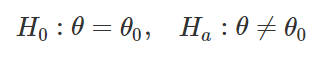

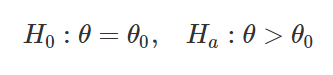

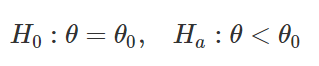

In [ ]:
display(Image(filename='C:\\Users\\LG_GRAM\\Desktop\\pic7.png'))
display(Image(filename='C:\\Users\\LG_GRAM\\Desktop\\pic5.png'))
display(Image(filename='C:\\Users\\LG_GRAM\\Desktop\\newp.png'))

## 검정통계량

귀무가설이 맞거나 틀렸다는 것을 증명하려면 어떤 증거가 있어야 한다.
<br>이 증거에 해당하는 숫자가 검정통계량이다. 보통 기호 t로 나타낸다. <br>검정통계량(test statistics)은 표본 데이터 집합을 입력으로 계산되는 함수의 값이다.

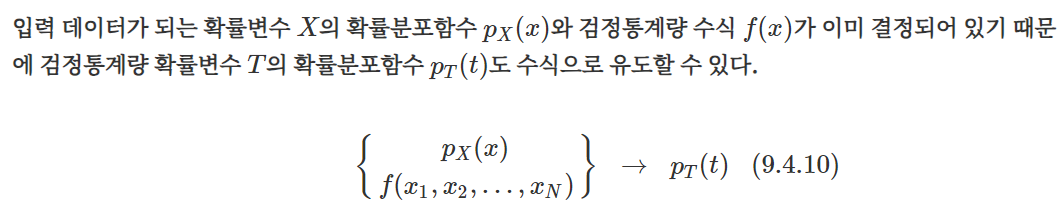

In [ ]:
display(Image(filename='C:\\Users\\LG_GRAM\\Desktop\\pic0.png'))

**예제 : 베르누이분포 확률변수** <br>
모수 μ를 가지는 베르누이분포 확률변수에 대해서는 전체 시도 횟수 N번 중 성공한 횟수 n자체를 검정통계량으로 쓸 수 있다. <br>이 검정통계량은 자유도 N과 모수 μ를 가지는 이항 분포를 따른다.

$$ x \approx \text{Bern}(x; \mu) \xrightarrow{} t = \sum_{i=1}^{N} x \approx \text{Bin}(t; N, \mu) $$


## 유의확률

이제 우리는 두가지 정보를 알고 있다.<br>

1. 검정통계량이 따르는 검정통계량 t의 확률분포 pT(x)를 알고 있다<br>
2. 실제 데이터에 구한 검정통계량의 값 t0, 즉 확률분포 pT(x)의 표본 1개를 가지고 있다.

가정된 귀무가설이 사실이라면 관측된 검정통계량은 검정통계량 분포의 기대값이나 최빈값 근처에 위치할 가능성이 높으며, <br>그러나 가정된 귀무가설이 사실이 아니라면 관측된 검정통계량은 검정통계량 분포에서 나올 가능성이 낮거나 이례적인 값일 가능성이 높을 것입니다.

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\3358737620.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


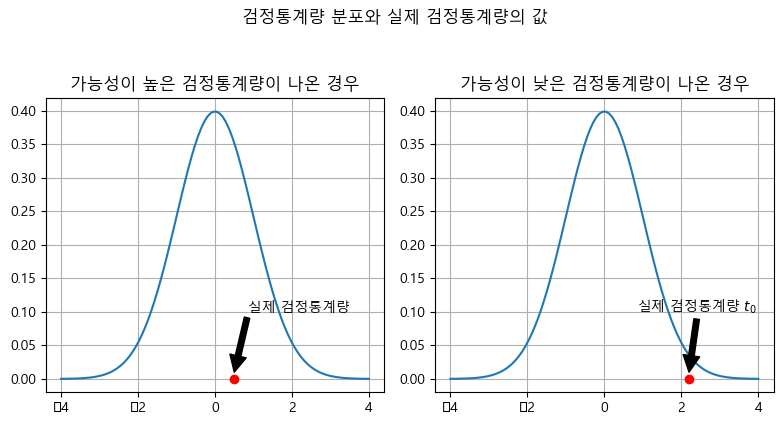

In [ ]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

xx1 = np.linspace(-4, 4, 100)
black = {"facecolor": "black"}

#High probability test statistic case
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 나온 경우")
plt.plot(xx1, sp.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
plt.grid(True)  

# Low probability test statistic case
plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 나온 경우")
plt.plot(xx1, sp.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
plt.grid(True)  


plt.suptitle("검정통계량 분포와 실제 검정통계량의 값", y=1.05)


plt.tight_layout()
plt.show()


유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail)부분에 해당하는 영역의 면적이다.<br>
누적확률분포함수 **F(x)** 를 사용하여 다음처럼 계산할 수 있다.

$$
\begin{align*}
\text{} \quad \text{유의확률} &= 2 \min(P(t \leq t_0), P(t \geq t_0)) \\
&= 2 \min(F(t_0), 1 - F(t_0))
\end{align*}
$$


유의확률은 확률분포와 확률분포의 표본값 1개가 주어졌을 때 그 확률분포에서 해당 표본값 혹은 더 희귀한(rare) 값이 나올 수 있는 확률로 정의한다.

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\2233240758.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


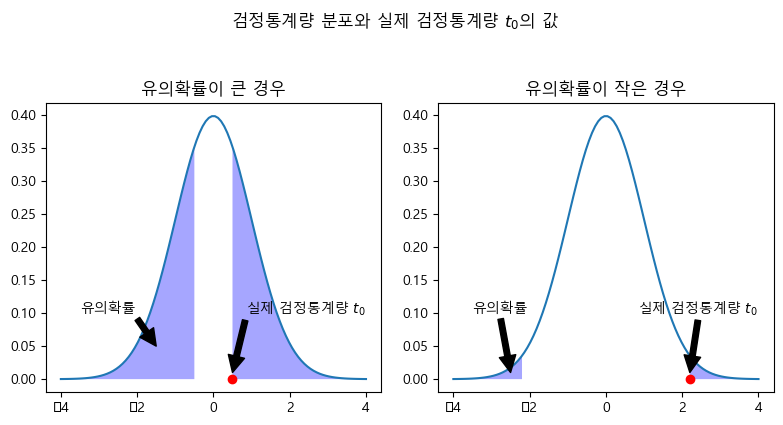

In [ ]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("유의확률이 큰 경우")
plt.plot(xx1, sp.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.fill_between(xx2, sp.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("유의확률이 작은 경우")
plt.plot(xx1, sp.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.fill_between(xx2, sp.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량 $t_0$의 값", y=1.05)
plt.tight_layout()
plt.show()

**검정의 관점에서 유의확률은** <br>귀무가설이 맞음에도 불구하고 현재 검정통계량값과 같은 혹은 대립가설을 더 옹호하는 검정통계량값이 나올 확률

## 단측검정 유의확률

만약 증명하고자 하는 대립가설이 부등식인 경우에는 그 대립가설을 옹호하는 검정통계량값이 나올 확률을 구할 때 <br> 특정한 한 방향의 확률만을 구해야 한다.이를 **단측검정(one-side test, single-tailed test)** 이라고 한다.

모수 θ가 특정한 값보다 크다는 것을 증명하는 경우는 **우측검정(right-side test)** 유의확률을 사용한다. <br>우측검정 유의확률은 귀무가설이 맞음에도 불구하고 검정통계량이 현재 검정통계량과 같거나 더 큰 값이 나오는 확률이다.

$$ \text{유의확률} = P(t \geq t_0 | H_0) = 1 - F(t_0) $$


만약 이산확률분포라면 등호가 성립하는 부분을 제외해야 하므로 다음처럼 구한다.

$$ \text{ 유의확률} = 1 - F(t_0 - 1) $$


모수 θ가 특정한 값보다 작다는 것을 증명하는 경우는 **좌측검정(left-tail test)** 유의확률을 사용한다. <br> 좌측검정 유의확률은 귀무가설이 맞음에도 불구하고 실제로 나온 검정통계량과 같거나 더 작은 값이 나오는 확률이다.

$$  \text{ 유의확률} = P(t \leq t_0 \,|\, H_0) = F(t_0) $$


## 유의수준과 기각역

유의확률값이 아주 작으면 귀무가설을 기각하고 대립가설을 채택할 수 있다.<br>
유의확률이 아주 작으면 즉, 귀무가설이 맞다는 가정하에 (귀무가설이 아닌 반대의) 대립가설을 옹호하는 <br>현재의 실제 결과가 나올 가능성이 거의 없다면, 틀린 것은 가장 처음의 가정 즉, 귀무가설이다. 따라서 귀무가설을 기각하고 대립가설을 채택한다.

‘아주 작다’는 판단을 위해서는 기준값이 필요하다. 계산된 유의확률값에 대해 귀무가설을 기각하는지 채택하는지를 결정할 수 있는 기준값을 <br> **유의수준(level of significance)** 라고 한다. 일반적으로 사용되는 유의수준은 1%, 5%, 10% 등이다. 

**유의확률이 유의수준보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.**

검정통계량이 나오면 확률밀도함수를 사용하여 유의확률을 계산할 수 있는 것처럼 <br>반대로 특정한 유의확률값에 대해 해당하는 검정통계량을 계산할 수도 있다. 유의수준에 대해 계산된 검정통계량을 **기각역(critical value)** 이라고 한다.

**예제:** <br>
이제 서두에서 제기한 문제를 다시 풀어보자. 동전의 앞면이 나오는 것을 베루누이분포로 모형화한다. 판단하고자하는 귀무가설은 베르누이분포 모수 μ
가 0.5라는 것이다.

$$ H_0 : \mu = 0.5 $$


이 문제에 대한 검정통계량은 앞면이 나온 횟수가 된다.

$$ t = \sum_{i=1}^{N} x_i = 12 $$


그리고 이 값은 전체 던진 횟수 N=15인 이항 분포를 따른다.

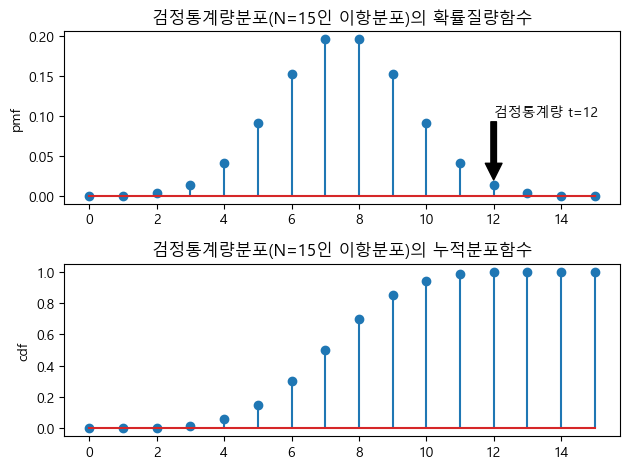

In [ ]:
N = 15
mu = 0.5
rv = sp.binom(N, mu)

xx = np.arange(N + 1)

plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel("pmf")
plt.title("검정통계량분포(N=15인 이항분포)의 확률질량함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=12', xy=(12, 0.02), xytext=(12, 0.1), arrowprops=black)

plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel("cdf")
plt.title("검정통계량분포(N=15인 이항분포)의 누적분포함수")

plt.tight_layout()
plt.show()

만약 단순히 동전이 공정하지 않다는 것을 보이고 싶다면 대립가설은 다음과 같다.
$$ H_a : \mu \neq 0.5 $$ 
이때는 양측검정 유의확률을 계산해야 한다. 검정통계량 t=12에 대한 양측검정 유의확률은 약 3.5%이다.
$$\text{유의확률} = 2 \cdot \text{Bin}(n \geq 12; N=15, \mu=0.5) = 2 \cdot (1 - F(11; N=15, \mu=0.5)) = 0.03515625 $$





In [ ]:
2 * (1 - rv.cdf(12 - 1))

0.03515625

만약 동전이 앞면이 더 많이 나온다는 것을 보이고 싶다면 대립가설은 다음과 같다.
$$ H_a : \mu > 0.5 $$ 

μ가 클수록 검정통계량도 커지므로 이때는 우측검정 유의확률을 계산해야 한다. 이 값은 약 1.8%다.
$$ \text{유의확률} = \text{Bin}(n \geq 12; N=15, \mu=0.5) = 1 - F(11; N=15, \mu=0.5) = 0.017578125 $$


In [ ]:
1 - rv.cdf(12 - 1)

0.017578125

## 9.5 사이파이를 사용한 검정

사이파이 패키지를 사용하면 직접 통계량을 계산하거나 통계량분포의 누적분포함수로 유의확률을 계산할 필요가 없다. 또한 검정으로 내린 결론이 틀린 경우인 1종오류와 2종오류에 대해서도 살펴본다.

## 이항검정

이항검정은 이항분포를 이용하여 베르누이 확률변수의 모수 μ
에 대한 가설을 조사하는 검정 방법이다. 사이파이 stats 서브패키지의 binom_test 명령은 이항검정의 유의확률을 계산한다. 디폴트 귀무가설은 μ=0.5
이다.

In [ ]:
from scipy.stats import binom_test

# Example data
x = 20  # Number of successes
n = 50  # Number of trials

# Perform two-sided binomial test
p_value = binom_test(x, n=n, p=0.5, alternative='two-sided')
print(f"P-value: {p_value}")


P-value: 0.20263875106454066


C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4168944362.py:8: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(x, n=n, p=0.5, alternative='two-sided')


x: 검정통계량. 1이 나온 횟수

n: 총 시도 횟수

p: 귀무가설의 μ값

alternative: 양측검정인 경우에는 'two-sided', 단측검정인 경우에는 'less' 또는 'greater'

예제: 실제 모수 μ0=0.5인 베르누이 확률 변수의 시뮬레이션을 통해 이항검정을 실습해보자. 데이터 개수 N=10일 때 1이 나온 횟수가 7이다.

In [ ]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

만약 0.5인 베르누이 분포에서 5가 나와야 한다는 귀무가설이었지만 7이 나왔다면, <br>모수가 0.5가 아닐 가능성을 확인하기 위해 이항 검정을 실시했더니 약 34%의 유의확률이 나왔다.

In [ ]:
sp.binom_test(n, N)

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\884150199.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  sp.binom_test(n, N)


0.34375

유의확률이 높으므로 모수가 0.5라는 귀무가설을 기각할 수 없다.

## 카이제곱 독립검정

카이제곱검정은 어떤 범주형 확률변수 X가 다른 범주형 확률변수 Y와 독립인지 <br>상관관계를 가지는가를 검증하는데도 사용할 수 있다. 카이제곱검정을 독립을 확인하는데 사용하면 카이제곱 독립검정이라고 부른다.

사이파이의 chi2_contingency() 명령은 이러한 검정을 수행한다. X의 값에 따른 각각의 Y분포가 2차원 표(contingency table)의<br> 형태로 주어지면 독립인 경우의 분포와 실제 y 표본본포의 차이를 검정통계량으로 계산한다. 이 값이 충분히 크다면 <br>X와 Y는 상관관계가 있다. chi2_contingency() 명령의 결과는 튜플로 반환되며 첫번째 값이 검정통계량, 두번째 값이 유의확률이다.

In [ ]:
obs = np.array([[5, 15], [10, 20]])
sp.chi2_contingency(obs)

Chi2ContingencyResult(statistic=0.0992063492063492, pvalue=0.7527841326498471, dof=1, expected_freq=array([[ 6., 14.],
       [ 9., 21.]]))

## 단일표본 z검정

**단일표본 z검정(One-sample z-test)** 은 분산 σ2의 값을 정확히 알고 있는 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. <br>단일표본 z검정의 경우에는 많이 사용되지 않고 사이파이에 별도의 함수가 준비되어 있지 않으므로<br> norm 명령의 cdf 메서드를 사용하여 직접 구현해야 한다.

실제 모수 μ0=0, σ2=1인 경우 대해 표본 데이터 N=10개를 시뮬레이션으로 구하여 귀무가설 μ0=0 에 대한 단일표본 z검정 명령을 실시해보자.

In [ ]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

단일표본 z검정 함수를 다음처럼 구현할 수 있다. 이 함수는 검정통계량과 유의확률을 튜플형태로 반환한다.

In [ ]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.norm().sf(np.abs(z))

ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

데이터 개수 N=100, 실제 모수 μ0=0인 경우 대해 단일표본 z검정 명령을 실시해보자.

In [ ]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

## 단일표본 t검정

**단일표본 t검정(One-sample t-test)** 은 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 검정통계량으로 스튜던트 t분포를 가진 t통계량을 사용한다. 


$$
\begin{equation}
\text{} \quad z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{N}}}
\end{equation}
$$


이 식에서 x̄는 표본평균, s는 표본표준편차다.


이파이의 stats 서브 패키지의 ttest_1samp 명령을 사용한다. ttest_1samp 명령의 경우에는 디폴트 모수가 없으므로 기댓값을 나타내는 popmean 인수를 직접 지정해야 한다.

scipy.stats.ttest_1samp(a, popmean)

1. a: 표본 데이터 배열

2. popmean: 귀무가설의 기댓값

In [ ]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\3253134558.py:5: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sp.stats.ttest_1samp(x, popmean=0)


TtestResult(statistic=2.28943967238967, pvalue=0.04781846490857058, df=9)

유의확률이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무가설을 기각할 수 있다. 따라서 μ≠0 다. 이 경우도 유형 1 오류의 예라고 볼 수 있다.<br>실제 모수 μ0 가 0 인데도 시뮬레이션 결과에 대한 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.




이번에는 데이터의 개수 N이 100인 경우에 대해 단일표본 t검정 명령을 실시해보자.

In [ ]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\3489410575.py:5: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sp.stats.ttest_1samp(x, popmean=0)


TtestResult(statistic=0.5904283402851698, pvalue=0.5562489158694675, df=99)

## 정규성검정

회귀 분석 등에서는 확률분포가 가우시안 정규분포를 따르는지 아닌지를 확인하는 것이 중요하다. <br>이러한 검정을 **정규성검정(normality test)** 이라고 한다. 정규성분포는 중요한만큼 다양한 검정 방법들이 개발되어 있으며 <br>사이파이 패키지 이외에 통계분석에 많이 사용되는 스탯츠모델즈(StatsModels) 패키지도 다양한 정규성검정 명령어를 제공한다.

콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test)은 사실 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법이다.<br> 예를 들어 다음처럼 두 개의 다른 정규분포에서 50개와 100개의 데이터 집합을 각각 생성해서 같은 분포에서 나왔는지 검정해보자.

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4034806244.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.norm, label="1번 데이터 집합", hist_kws={"edgecolor": "white"})
C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\4034806244.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

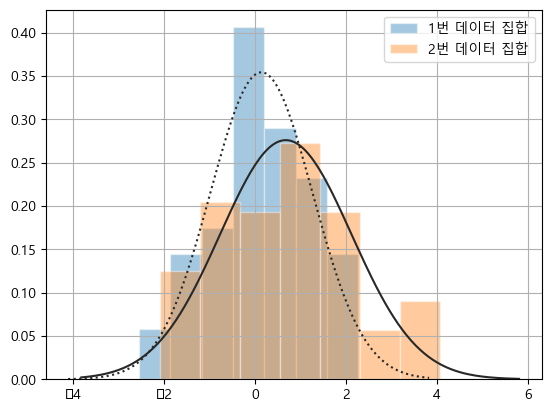

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt

np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.norm(0, 1).rvs(N1)
x2 = sp.norm(0.5, 1.5).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=sp.norm, label="1번 데이터 집합", hist_kws={"edgecolor": "white"})
ax = sns.distplot(x2, kde=False, fit=sp.norm, label="2번 데이터 집합", hist_kws={"edgecolor": "white"})
ax.lines[0].set_linestyle(":")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
sp.stats.ks_2samp(x1, x2)

C:\Users\LG_GRAM\AppData\Local\Temp\ipykernel_1892\151462128.py:1: DeprecationWarning: Please use `ks_2samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sp.stats.ks_2samp(x1, x2)


KstestResult(statistic=0.23, pvalue=0.05550723364321592, statistic_location=0.44386323274542566, statistic_sign=1)

유의확률이 4.95%로 만약 유의 수준이 5%라면 두 분포는 서로 다른 분포라고 볼 수 있다.